<a href="https://colab.research.google.com/github/steffiangel/ml_lab/blob/main/2348510_DL_lab1_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


For f(x) = x^2 - 2x + 2:
Global Minima: 0.9999996786123911
Number of Iterations: 66

For f(x, y) = (1 - x)^2 + 100(y - x^2)^2:
Global Minima (x): 0.6738860510540382
Global Minima (y): 0.45255952092681595
Number of Iterations: 1000


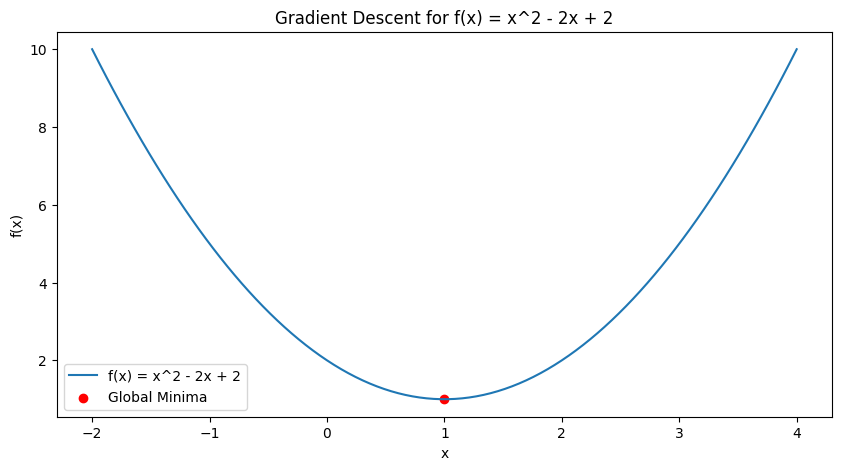

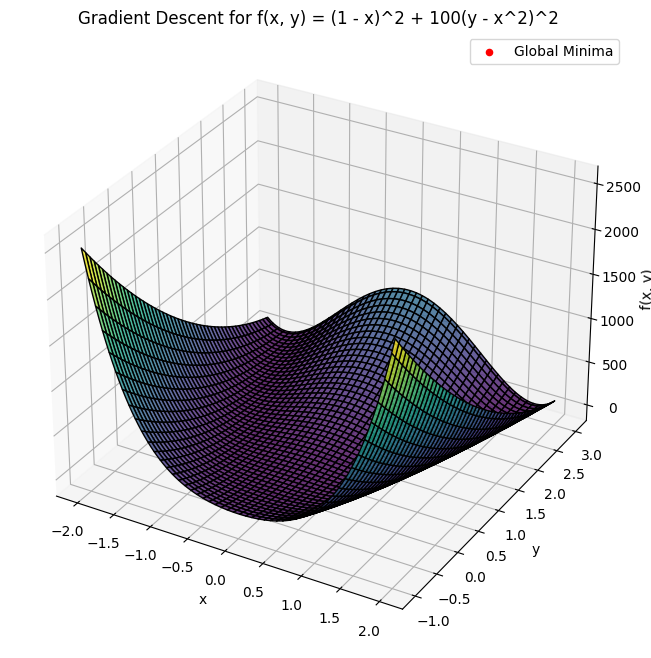

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def f1(x):
    return x**2 - 2*x + 2

def f2(x, y):
    return (1 - x)**2 + 100*(y - x**2)**2

def gradient_descent_1D(derivative, learning_rate=0.1, initial_x=0, max_iterations=1000, tolerance=1e-6):
    x = initial_x
    iterations = 0

    while iterations < max_iterations:
        gradient = derivative(x)
        x = x - learning_rate * gradient

        if np.abs(gradient) < tolerance:
            break

        iterations += 1

    return x, iterations

def gradient_descent_2D(derivative_x, derivative_y, learning_rate=0.001, initial_x=0, initial_y=0, max_iterations=1000, tolerance=1e-6):
    x, y = initial_x, initial_y
    iterations = 0

    while iterations < max_iterations:
        gradient_x = derivative_x(x, y)
        gradient_y = derivative_y(x, y)
        x = x - learning_rate * gradient_x
        y = y - learning_rate * gradient_y

        if np.sqrt(gradient_x**2 + gradient_y**2) < tolerance:
            break

        iterations += 1

    return x, y, iterations

# Gradient descent for f(x) = x^2 - 2x + 2
derivative_f1 = lambda x: 2*x - 2
minima_x1, iterations_x1 = gradient_descent_1D(derivative_f1)

# Gradient descent for f(x, y) = (1 - x)^2 + 100(y - x^2)^2
derivative_f2_x = lambda x, y: -2*(1 - x) - 400*x*(y - x**2)
derivative_f2_y = lambda x, y: 200*(y - x**2)
minima_x2, minima_y2, iterations_x2 = gradient_descent_2D(derivative_f2_x, derivative_f2_y)

# Print results
print("\nFor f(x) = x^2 - 2x + 2:")
print("Global Minima:", minima_x1)
print("Number of Iterations:", iterations_x1)

print("\nFor f(x, y) = (1 - x)^2 + 100(y - x^2)^2:")
print("Global Minima (x):", minima_x2)
print("Global Minima (y):", minima_y2)
print("Number of Iterations:", iterations_x2)

# Visualize results for f(x) = x^2 - 2x + 2
x_values_f1 = np.linspace(-2, 4, 100)
y_values_f1 = f1(x_values_f1)

plt.figure(figsize=(10, 5))
plt.plot(x_values_f1, y_values_f1, label='f(x) = x^2 - 2x + 2')
plt.scatter(minima_x1, f1(minima_x1), color='red', marker='o', label='Global Minima')
plt.title('Gradient Descent for f(x) = x^2 - 2x + 2')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.show()

# Visualize results for f(x, y) = (1 - x)^2 + 100(y - x^2)^2
x_values_f2 = np.linspace(-2, 2, 100)
y_values_f2 = np.linspace(-1, 3, 100)
x_mesh, y_mesh = np.meshgrid(x_values_f2, y_values_f2)
z_values_f2 = f2(x_mesh, y_mesh)

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x_mesh, y_mesh, z_values_f2, cmap='viridis', alpha=0.8, edgecolors='k')
ax.scatter(minima_x2, minima_y2, f2(minima_x2, minima_y2), color='red', marker='o', label='Global Minima')
ax.set_title('Gradient Descent for f(x, y) = (1 - x)^2 + 100(y - x^2)^2')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')
plt.legend()
plt.show()
